<a href="https://colab.research.google.com/github/MrCee95/Stock-Price-Prediction/blob/main/Apple_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install matplotlib-venn

In [9]:
#this program implements artificial recurrent neural network called Long Short Term Memory LSTM
#to predict the closing stock price of a corporation for a given number of days stock price.
import math
!pip install pandas-datareader # Install the pandas-datareader package
import pandas_datareader as web # Correct the import statement to pandas_datareader
import numpy as np
import pandas as pd # Correct the import statement to pandas
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential # Correct the import statement to keras.models
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import yfinance as yf # Import yfinance for more reliable data retrieval


plt.style.use('fivethirtyeight')

In [10]:
# Get the stock quote using yfinance

ticker = "AAPL"
# Adjust the end date to today's date
end_date = pd.Timestamp.today().strftime('%Y-%m-%d')
df = yf.download(ticker, start='2010-01-01', end=end_date)

# Print some info to check if the data was retrieved successfully
df.info()

[*********************100%***********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3775 entries, 2010-01-04 to 2025-01-02
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  3775 non-null   float64
 1   (Close, AAPL)      3775 non-null   float64
 2   (High, AAPL)       3775 non-null   float64
 3   (Low, AAPL)        3775 non-null   float64
 4   (Open, AAPL)       3775 non-null   float64
 5   (Volume, AAPL)     3775 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 206.4 KB


In [12]:
#Get the number of rows and columns in the data set
df.shape   # number of rows and columns in the data set will show

(3775, 6)

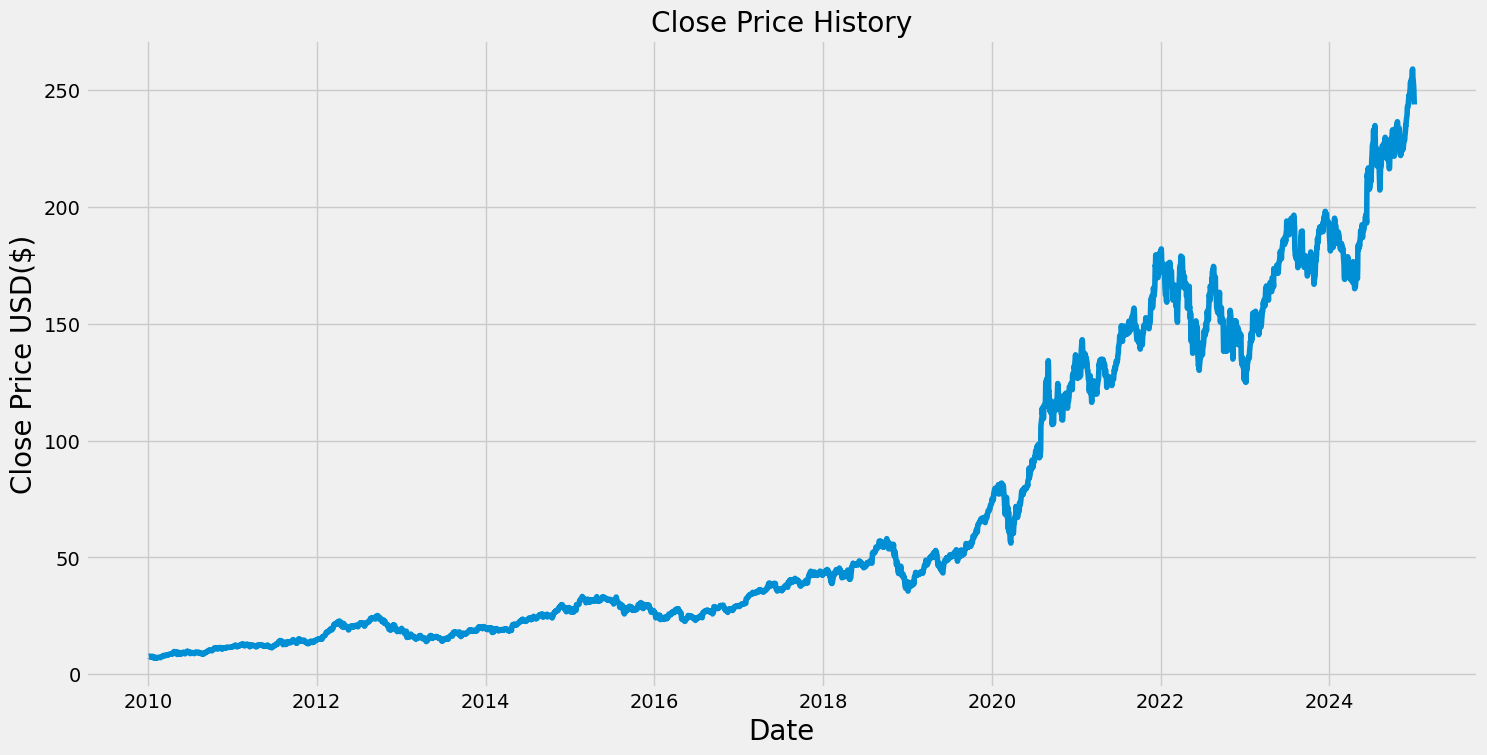

In [15]:
#show closing price history
plt.figure(figsize=(16,8))  # Pass figsize as a tuple within the plt.figure() call
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 20)  # Correct the fontsize argument here
plt.ylabel('Close Price USD($)', fontsize = 20)
plt.show()    #it'll show the plot or graph

In [30]:
#create a new dataframe with only the 'Close' column
# Ensure the column name is 'Close' and not something else like 'close'
data = df[['Close']]
#convert the dataframe to a numpy array
dataset = data.values
#get the number of rows to train the data on
training_data_len = math.ceil( len(dataset)* .9)
print(training_data_len)

3398


In [31]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1)) #feature_range should be a tuple
scaled_data = scaler.fit_transform(dataset) #Assignment operator should be '='
print (scaled_data)     #values in dataset will be displayed

[[0.00311025]
 [0.00316266]
 [0.00267969]
 ...
 [0.97295383]
 [0.96589485]
 [0.9398401 ]]


In [34]:
#create the training data set
#create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
#split data into x_train and y_train data sets
x_train = []
y_train = []

In [36]:
for i in range(90, len(train_data)):
    x_train.append(train_data[i - 90: i, 0])
    y_train.append(train_data[i,0])

    if i<= 60:
        print(x_train)
        print(y_train)
        print()    #data set for the last 90days will show including the 91st day

In [38]:
#convert x_train and y_train to numpy arrays
x_train, y_train= np.array(x_train), np.array(y_train)

In [41]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) # Pass the new shape as a tuple
x_train.shape

(3308, 90, 1)

In [44]:
#build LSTM model
model = Sequential() # Corrected typo: Seqential to Sequential
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1)) # Removed extra indentation

In [47]:
#Compile the model
model.compile(optimizer ='adam', loss ='mean_squared_error')
#train the model
model.fit(x_train, y_train, batch_size=1, epochs = 1)

3308/3308 ━━━━━━━━━━━━━━━━━━━━ 142s 42ms/step - loss: 9.7841e-04


In [49]:
#create the testing data set
#create a new array containing scaled values from index any number to another number
test_data = scaled_data[training_data_len - 60:, :]

In [51]:
#create the data set x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(90, len(test_data)):
    x_test.append(test_data[i - 90: i, 0])

In [53]:
#Convert the data to a numpy array
x_test = np.array(x_test)

#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [55]:
#get the modules predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


12.547133267290919


<ipython-input-58-a531477e9937>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


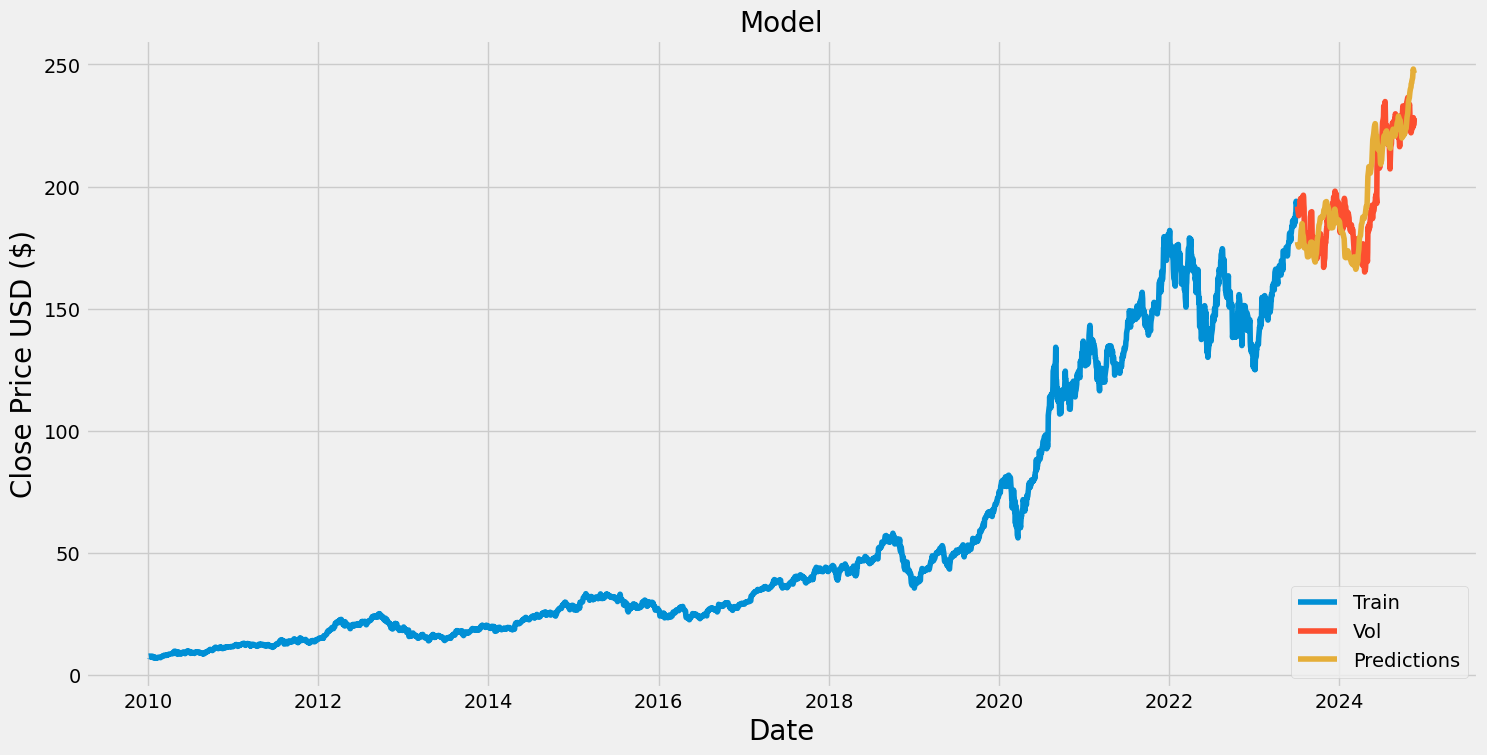

In [58]:
#set the root mean squre error(RMSE)
# Ensure both arrays have the same length for the calculation
rmse = np.sqrt(np.mean((predictions - y_test[:len(predictions)])**2))
print(rmse)
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:training_data_len + len(predictions)] # Adjust valid data range
valid['Predictions'] = predictions
#visualize the data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=20)
plt.ylabel('Close Price USD ($)', fontsize=20)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Vol', 'Predictions'], loc='lower right') # Use loc for legend position
plt.show()

In [59]:
#show the valid predicted prices
valid

Price,Close,Predictions
Ticker,AAPL,
Date,,
2023-07-06,191.809998,177.271774
2023-07-07,190.679993,176.377945
2023-07-10,188.610001,175.596725
2023-07-11,188.080002,175.230011
2023-07-12,189.770004,175.317490
...,...,...
2024-11-12,224.229996,246.083740
2024-11-13,225.119995,247.608673


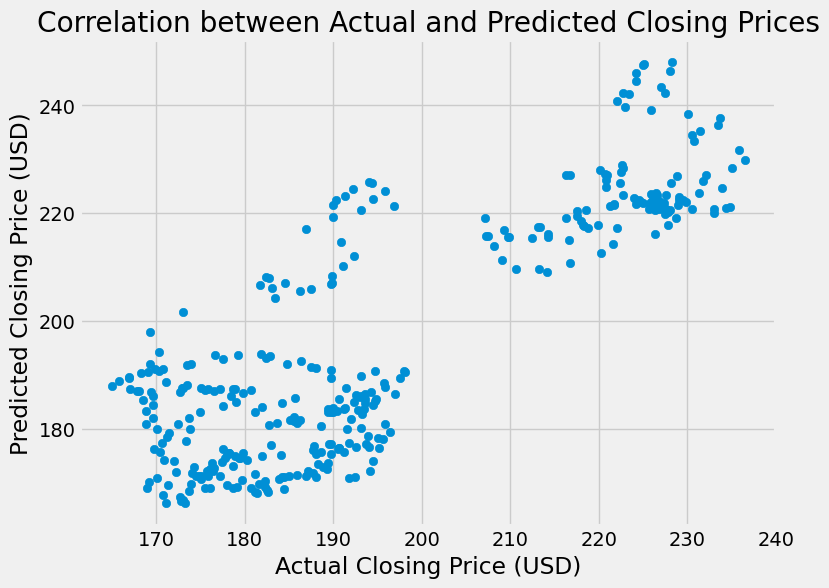

In [60]:
# @title Correlation between Actual and Predicted Closing Prices

import matplotlib.pyplot as plt

# Assuming your data is in a pandas DataFrame called 'valid'

plt.figure(figsize=(8, 6))
plt.scatter(valid['Close'], valid['Predictions'])
plt.xlabel('Actual Closing Price (USD)')
plt.ylabel('Predicted Closing Price (USD)')
_ = plt.title('Correlation between Actual and Predicted Closing Prices')


In [70]:
import yfinance as yf

# Get the stock quote using yfinance
# Change end date to today's date to avoid fetching future data
end_date = pd.Timestamp.today().strftime('%Y-%m-%d')
AAPL_quote = yf.download('AAPL', start='2010-01-01', end=end_date)

# Print column names to verify
print(AAPL_quote.columns)

# Create a new data frame, using the correct column name
# Check if 'Close' exists in columns, otherwise use 'close'
# Updated to check columns directly from AAPL_quote
new_df = AAPL_quote[['Close']] if 'Close' in AAPL_quote.columns else AAPL_quote[['close']]

# Get the last 90 days closing price values and convert the dataframe into an array
last_90_days = new_df[-90:].values

# Scale the last_90_days data using the previously fitted scaler
last_90_days_scaled = scaler.transform(last_90_days)  # Scale the data


# Create an empty list
x_test = []

# Append the past 90 days
x_test.append(last_90_days_scaled)

# Convert the x_test data set to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the predicted scaled price
pred_pri = model.predict(x_test)  # Use the model to predict, not scaler
pred_pri = scaler.inverse_transform(pred_pri)

print(pred_pri)

[*********************100%***********************]  1 of 1 completed

MultiIndex([('Adj Close', 'AAPL'),
            (    'Close', 'AAPL'),
            (     'High', 'AAPL'),
            (      'Low', 'AAPL'),
            (     'Open', 'AAPL'),
            (   'Volume', 'AAPL')],
           names=['Price', 'Ticker'])
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[244.10373]]


In [73]:
import yfinance as yf

# Get the stock quote using yfinance
# Use today's date or a past date
end_date = pd.Timestamp.today().strftime('%Y-%m-%d')
AAPL_quote2 = yf.download('AAPL', start='2023-01-02', end=end_date)  # Use a valid date range

# Print the closing price if available
if 'Close' in AAPL_quote2.columns:
    print(AAPL_quote2['Close'])
else:
    print("Closing price data not found for the specified date range.")

[*********************100%***********************]  1 of 1 completed

Ticker            AAPL
Date                  
2023-01-03  125.070000
2023-01-04  126.360001
2023-01-05  125.019997
2023-01-06  129.619995
2023-01-09  130.149994
...                ...
2024-12-26  259.019989
2024-12-27  255.589996
2024-12-30  252.199997
2024-12-31  250.419998
2025-01-02  243.850006

[503 rows x 1 columns]
